<a href="https://colab.research.google.com/github/hannahcanon09/sales-predictions/blob/main/CANON_Project_1_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROJECT 1: SALES PREDICTION**

# Mount drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Imports

In [2]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(display='diagram')

# Load the data

In [3]:
# read csv file
file = '/content/drive/MyDrive/Colab Notebooks/Data /sales_predictions_2023.csv'
df= pd.read_csv(file)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Clean the data
*   Check the shape of the dataframe
*   Check data types  
*   Check for duplicate values
*   Check for missing values
*   Check for statistics
*   Check inconsistencies

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Shape of the dataframe

In [5]:
# To identify the number of columns and rows in the dataframe
df.shape

(8523, 12)

There are 8523 rows and 12 columns

In [6]:
# check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
# check data types
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

There are objects, floats and integers present in the dataset

## Duplicate values

In [8]:
# check number of duplicate values
df.duplicated().sum()

0

There are no duplicate values

## Missing values

In [9]:
# check for missing values
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

There are 1462 missing values in Item_Weight and 2410 missing values in Outlet_Size. These missing values will be filled in during preprocessing using SimpleImputer

In [10]:
# Divide number of missing values to number of total rows
divide_missing_itemweight = 1462/8523
divide_missing_itemweight

0.17153584418631937

In [11]:
# convert into percentage
percent_item_weight = divide_missing_itemweight * 100
percent_item_weight

17.153584418631937

17% of rows in Item_Weight have missing values (2410 missing rows/ 8523 number of rows)

In [12]:
# Divide number of missing values to number of total rows
divide_missing_outletsize = 2410/8523
divide_missing_outletsize

0.2827642848762173

In [13]:
# convert into percentage
percent_outlet_size = divide_missing_outletsize * 100
percent_outlet_size

28.27642848762173

28% of rows in Outlet_Size have missing values (2410 missing rows/ 8523 number of rows)

## Inconsistencies

### Item_Weight

In [14]:
# check for inconsistencies
# Item_Weight
df['Item_Weight'].value_counts()

12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64

There are no inconsistencies with Item_Weight

### Item_Fat_Content

In [15]:
# check for inconsistencies
# Item_Fat_Content
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [16]:
# Replace LF, low fat, Reg and reg into Low Fat and Regular to make col Item_Fat_Content consistent

# Replace LF into Low Fat
df['Item_Fat_Content'].replace ('LF', 'Low Fat', inplace = True)

# Replace low fat into Low Fat
df['Item_Fat_Content'].replace ('low fat', 'Low Fat', inplace = True)

# Replace Reg into Regular
df['Item_Fat_Content'].replace ('Reg', 'Regular', inplace = True)

# Replace reg into Regular
df['Item_Fat_Content'].replace ('reg', 'Regular', inplace = True)

In [17]:
# Double check if replacing worked
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

There are no more inconsistencies with Item_Fat_Content

### Item_Visibility

In [18]:
# check for inconsistencies
# Item_Visibility
df['Item_Visibility'].value_counts()

0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: Item_Visibility, Length: 7880, dtype: int64

There are no inconsistencies with Item_Visibility

### Item_Type

In [19]:
# check for inconsistencies
# # Item_Type
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

There are no inconsistencies with Item_Type

### Item_MRP

In [20]:
# check for inconsistencies
# Item_MRP
df['Item_MRP'].value_counts()

172.0422    7
170.5422    6
196.5084    6
188.1872    6
142.0154    6
           ..
97.3384     1
83.1934     1
96.6752     1
152.6682    1
75.4670     1
Name: Item_MRP, Length: 5938, dtype: int64

There are no inconsistencies with Item_MRP

### Outlet_Identifier

In [21]:
# check for inconsistencies
# Outlet_Identifier
df['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

There are no inconsistencies with Outlet_Identifier

### Outlet_Establishment_Year

In [22]:
# check for inconsistencies
# Outlet_Establishment_Year
df['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

There are no inconsistencies with Outlet_Establishment_Year

### Outlet_Size

In [23]:
# check for inconsistencies
# Outlet_Size
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

There are no inconsistencies with Outlet_Size

### Outlet_Location_Type

In [24]:
# check for inconsistencies
# Outlet_Location_Type
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

There are no inconsistencies with Outlet_Location_Type

### Outlet_Type

In [25]:
# check for inconsistencies
# Outlet_Type
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

There are no inconsistencies with Outlet_Type

### Item_Outlet_Sales

In [26]:
# check for inconsistencies
# Item_Outlet_Sales
df['Item_Outlet_Sales'].value_counts()

958.7520     17
1342.2528    16
703.0848     15
1845.5976    15
1278.3360    14
             ..
4124.6310     1
6622.7126     1
1614.5650     1
5602.7070     1
2778.3834     1
Name: Item_Outlet_Sales, Length: 3493, dtype: int64

There are no inconsistencies with Item_Outlet_Sales

## Statistics

In [27]:
# check statistics
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# Univariate Visualizations
*   Histogram
*   Bar Chart



## Histograms

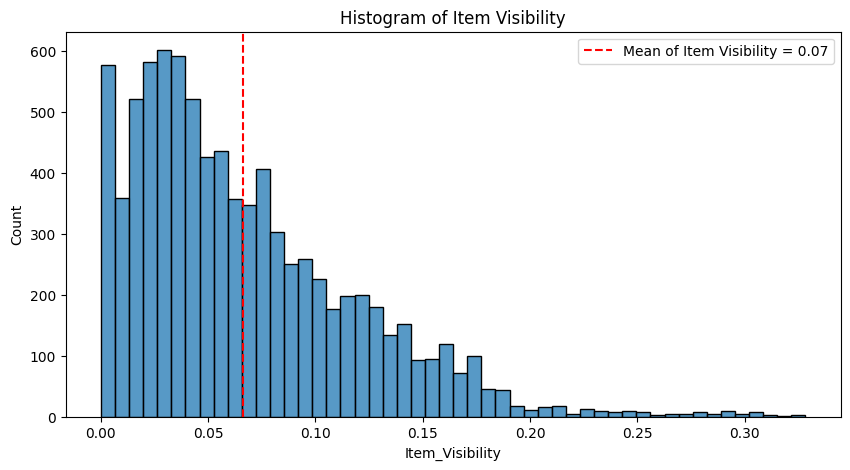

In [28]:
# Univariate exploratory visualizations

# Plot histogram of Item_Visibility
fig, ax = plt.subplots (figsize = (10,5))

# plot histogram for col Item_Visibility
sns.histplot (data = df, x = 'Item_Visibility', ax = ax)

# labels and chart title
ax.set(title = 'Histogram of Item Visibility')

# Annotate mean
mean_item_visibility = df['Item_Visibility'].mean()
ax.axvline(mean_item_visibility, color = 'red', ls = '--', label = f'Mean of Item Visibility = {round(mean_item_visibility,2)}')

# show legend
ax.legend();

The histogram is right skewed. With relatively low percentages of item visibility, it shows that the visibility of the items are evenly distributed. Only a selected few have higher visibility than others, which can be due to a promotion, sale or higher demand of these items.

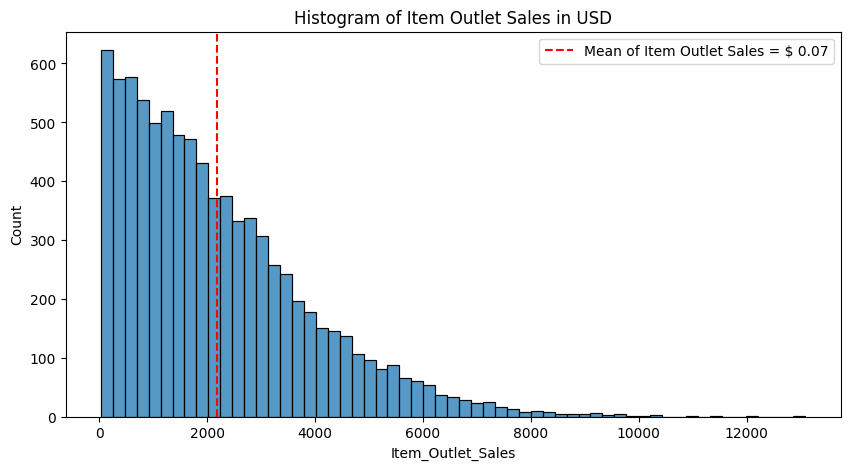

In [29]:
# Univariate exploratory visualizations

# Plot histogram of Item_Outlet_Sales
fig, ax = plt.subplots (figsize = (10,5))

# plot histogram for Item_Outlet_Sales
sns.histplot (data = df, x = 'Item_Outlet_Sales', ax = ax)

# labels and chart title
ax.set(title = 'Histogram of Item Outlet Sales in USD')

# Annotate mean
mean_item_outlet_sales = df['Item_Outlet_Sales'].mean()
ax.axvline(mean_item_outlet_sales, color = 'red', ls = '--', label = f'Mean of Item Outlet Sales = $ {round(mean_item_visibility,2)}')

# show legend
ax.legend();

The histogram is right skewed. This means that the data is concentrated on the left with a tail on the right. This means that some stores have better sales than most. The stores with sales on the concentrated area can employ similar strategies than those on the right tail to improve their sales.

## Bar Graphs

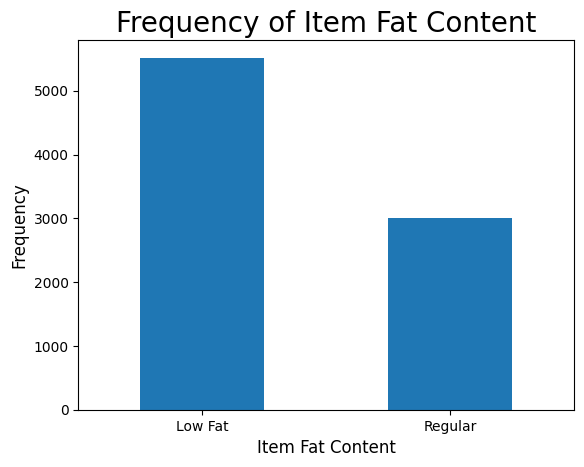

In [30]:
# Univariate exploratory visualizations

item_fat_types = df['Item_Fat_Content'].value_counts()

# bar graph for marital status
item_fat_types.plot(kind='bar')

# Add title and labels
plt.xlabel ('Item Fat Content', fontsize = 12)
plt.ylabel ('Frequency', fontsize = 12)
plt.title('Frequency of Item Fat Content', fontsize = 20)

# Rotate x-ticks
plt.xticks (rotation = 0)

plt.show();

The Frequency of Item Fat Content shows how more than half of items are identified to be Low Fat and the remaining to be have a regular fat content.

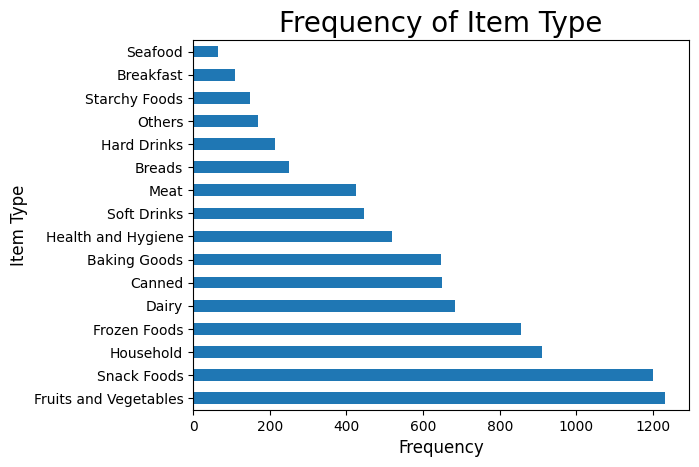

In [31]:
# Univariate exploratory visualizations

item_types = df['Item_Type'].value_counts()

# bar graph for marital status
item_types.plot(kind='barh')

# Add title and labels
plt.xlabel ('Frequency', fontsize = 12)
plt.ylabel ('Item Type', fontsize = 12)
plt.title('Frequency of Item Type', fontsize = 20)

# Rotate x-ticks
plt.xticks (rotation = 0)

plt.show();

Frequency of Item Type shows how the top 3 item types sold are Fruits anf Vegetables, Snack Foods and Household items. On the other hand, the bottom 3 item types are Seafood, Breakfast items and Starchy Foods.

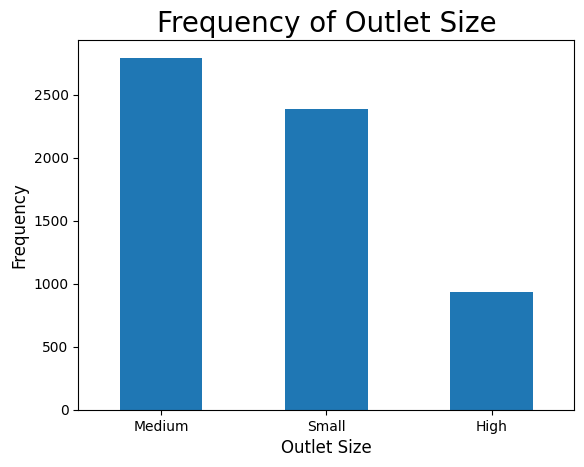

In [32]:
# Univariate exploratory visualizations

outlet_size_types = df['Outlet_Size'].value_counts()

# bar graph for marital status
outlet_size_types.plot(kind='bar')

# Add title and labels
plt.xlabel ('Outlet Size', fontsize = 12)
plt.ylabel ('Frequency', fontsize = 12)
plt.title('Frequency of Outlet Size', fontsize = 20)

# Rotate x-ticks
plt.xticks (rotation = 0)

plt.show();

Frequency of Outlet Size shows medium size to have the highest frequency with high size to have the least frequency. There is a significant number of unknown values as well.

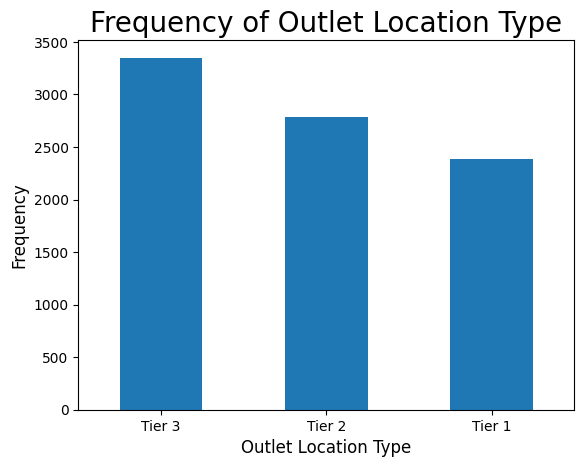

In [33]:
# Univariate exploratory visualizations

outlet_location_types = df['Outlet_Location_Type'].value_counts()

# bar graph for marital status
outlet_location_types.plot(kind='bar')

# Add title and labels
plt.xlabel ('Outlet Location Type', fontsize = 12)
plt.ylabel ('Frequency', fontsize = 12)
plt.title('Frequency of Outlet Location Type', fontsize = 20)

# Rotate x-ticks
plt.xticks (rotation = 0)

plt.show();

The Frequency of Outlet Location Type shows Tier 1 to have the highest frequency amongst the three tiers. It is followed by Tier 2 and lastly, Tier 1.

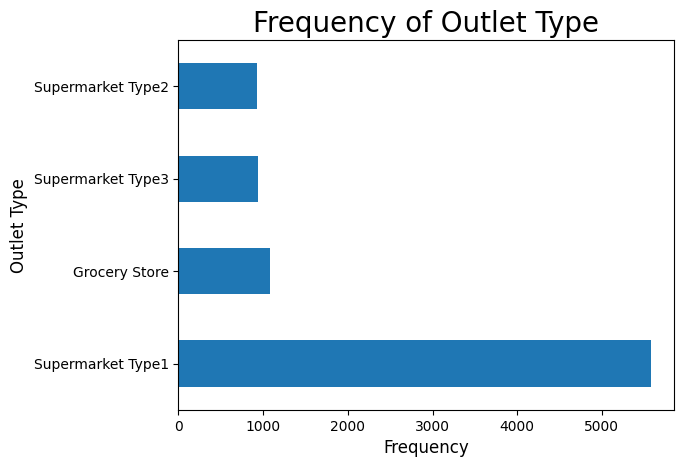

In [34]:
# Univariate exploratory visualizations

outlet_types = df['Outlet_Type'].value_counts()

# bar graph for marital status
outlet_types.plot(kind='barh')

# Add title and labels
plt.xlabel ('Frequency', fontsize = 12)
plt.ylabel ('Outlet Type', fontsize = 12)
plt.title('Frequency of Outlet Type', fontsize = 20)

# Rotate x-ticks
plt.xticks (rotation = 0)

plt.show();

The Frequency of Outlet Type shows how most outlet types are identified to be Supermarket Type1. The remaining types, Supermarket Type2, Supermarket Type3, and Grocery Store have around the same frequency at 1000.

# Multivariate Visualizations
*   Bar Graph
*   Boxplot
*   Heatmap


## Item Outlet Sales by Item Fat Content

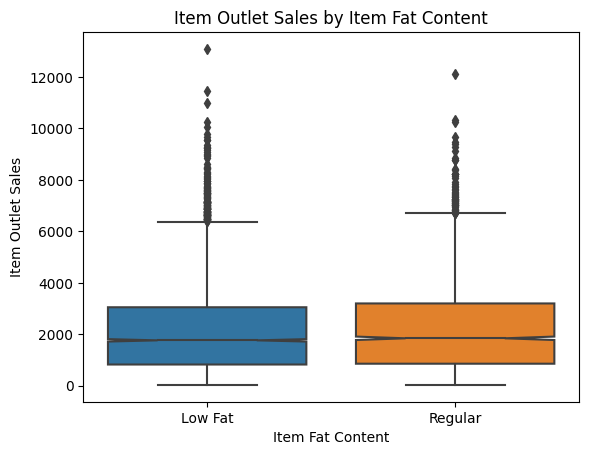

In [35]:
# boxplot for item outlet sales by Item Fat Content
sns.boxplot(data = df, x='Item_Fat_Content', y = 'Item_Outlet_Sales', notch = True);

# Set title and labels
plt.title ('Item Outlet Sales by Item Fat Content', fontsize= 'large')
plt.xlabel('Item Fat Content', fontsize = 'medium')
plt.ylabel('Item Outlet Sales', fontsize = 'medium')

# adjust x-ticks
plt.xticks(rotation=0);

Item Outlet Sales by Item Fat Content shows both boxplots to be right skewed or positive skewed. There is a significant amount of outliers on both boxplots. Low Fat and Regular also have around the same average sales as well.

## Item Outlet Sales by Outlet Size

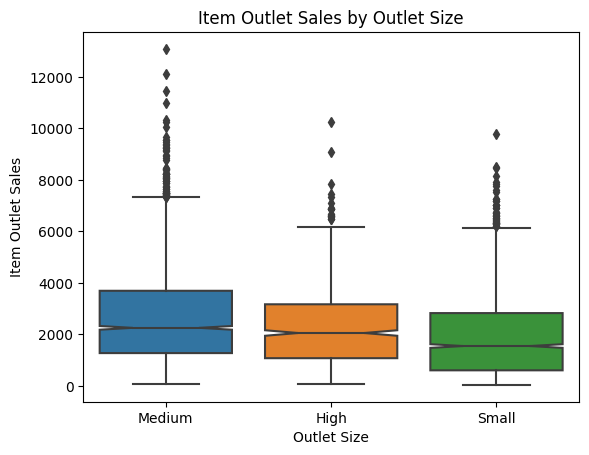

In [36]:
# boxplot for item outlet sales by outlet size
sns.boxplot(data = df, x='Outlet_Size', y = 'Item_Outlet_Sales', notch = True);

# Set title and labels
plt.title ('Item Outlet Sales by Outlet Size', fontsize= 'large')
plt.xlabel('Outlet Size', fontsize = 'medium')
plt.ylabel('Item Outlet Sales', fontsize = 'medium')

# adjust x-ticks
plt.xticks(rotation=0);

Item Outlet Sales by Outlet Size shows all four boxplots to be right skewed or positive skewed. Medium has a significant number of outliers, where some of which are more than $12000 outlet sales. As such, strategies used by medium outlet sizes can be explored further to improve sales of other outlet sizes.

In [37]:
# get average item outlet sales by outlet size
mean_sales_size = df.groupby ('Outlet_Size')['Item_Outlet_Sales'].mean()
mean_sales_size

Outlet_Size
High      2298.995256
Medium    2681.603542
Small     1912.149161
Name: Item_Outlet_Sales, dtype: float64

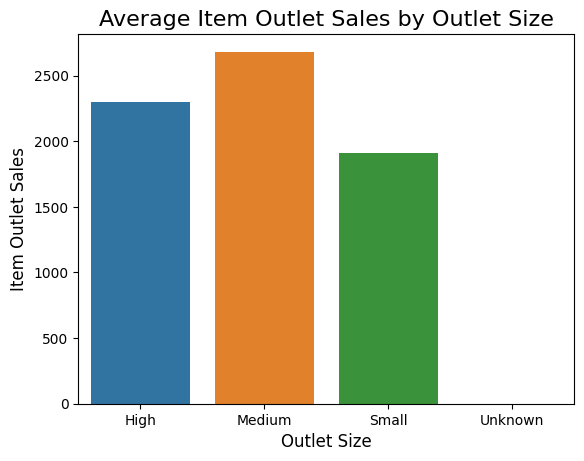

In [38]:
#barplot of the item outlet sales by outlet size
sns.barplot(x = mean_sales_size.index,
            y= mean_sales_size.values,
            order = ['High', 'Medium', 'Small', 'Unknown']);

# set title and labels
plt.xlabel ('Outlet Size', fontsize = 12)
plt.ylabel ('Item Outlet Sales', fontsize = 12)
plt.title ('Average Item Outlet Sales by Outlet Size', fontsize = 16)

# set xticks
plt.xticks (rotation = 0)

plt.show();

Average Item Outlet Sales by Outlet Size shows Medium to have the highest average with Unknown to have the lowest average. As mentioned, strategies used by medium outlets can be explored further in an effort to increase sales of other outlet sizes.

## Item Outlet Sales by Outlet Location Type

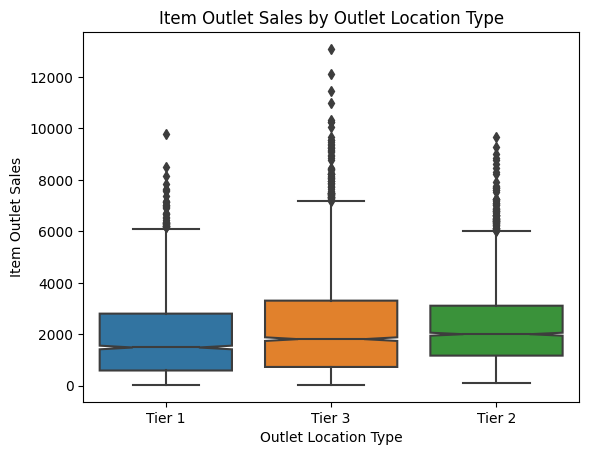

In [39]:
# boxplot for Item Outlet Sales by Outlet Location Type
sns.boxplot(data = df, x='Outlet_Location_Type', y = 'Item_Outlet_Sales', notch = True);

# Set title and labels
plt.title ('Item Outlet Sales by Outlet Location Type', fontsize= 'large')
plt.xlabel('Outlet Location Type', fontsize = 'medium')
plt.ylabel('Item Outlet Sales', fontsize = 'medium')

# adjust x-ticks
plt.xticks(rotation=0);

Item Outlet Sales by Outlet Location Type shows the three boxplots to be right skewed or positive skewed. Tier 2 has a better average sales than Tier 1 and Tier 3. Strategies employed by outliers of Tier 3 can be studied further in an effort to improve sales of other tiers.

## Item Outlet Sales by Outlet Type

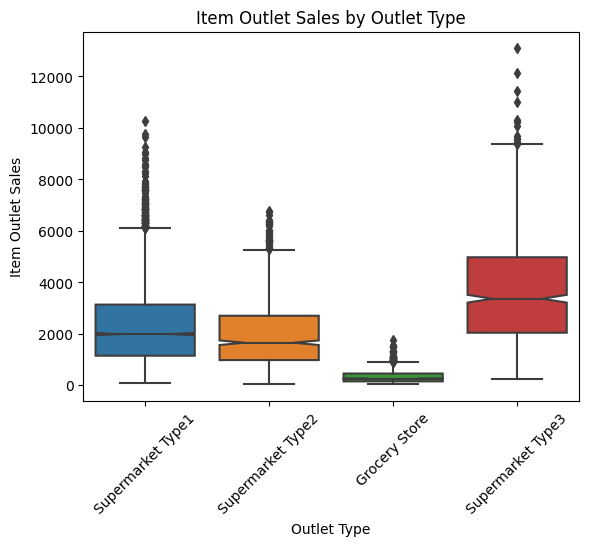

In [40]:
# boxplot for Item Outlet Sales by Outlet Type
sns.boxplot(data = df, x='Outlet_Type', y = 'Item_Outlet_Sales', notch = True);

# Set title and labels
plt.title ('Item Outlet Sales by Outlet Type', fontsize= 'large')
plt.xlabel('Outlet Type', fontsize = 'medium')
plt.ylabel('Item Outlet Sales', fontsize = 'medium')

# adjust x-ticks
plt.xticks(rotation=45);

Item Outlet Sales by Outlet Type shows all four boxplots to be right skewed or positive skewed. All four have a significant amount of outliers, however, Supermarket Type3 has outliers above $10,000. These outlets can be studied to determine what strategies used helped increase their sales and which strategies may be appropriate for other outlet types.

In [41]:
# get average item outlet sales by outlet type
mean_sales_outlet_type = df.groupby ('Outlet_Type')['Item_Outlet_Sales'].mean()
mean_sales_outlet_type

Outlet_Type
Grocery Store         339.828500
Supermarket Type1    2316.181148
Supermarket Type2    1995.498739
Supermarket Type3    3694.038558
Name: Item_Outlet_Sales, dtype: float64

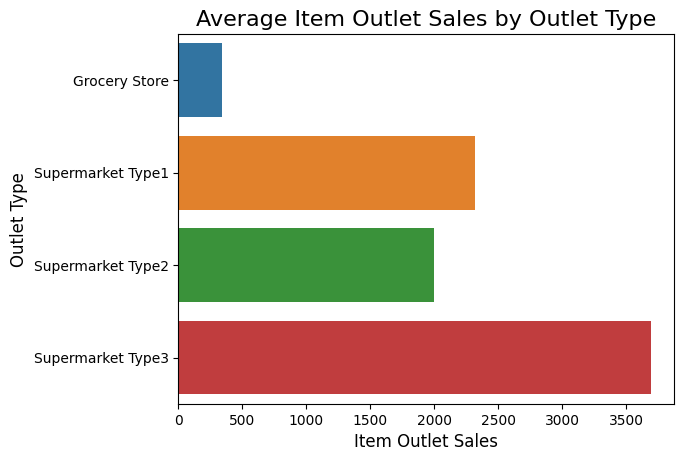

In [42]:
#barplot of the item outlet sales by outlet size
sns.barplot(x = mean_sales_outlet_type.values,
            y= mean_sales_outlet_type.index);

# set title and labels
plt.xlabel ('Item Outlet Sales', fontsize = 12)
plt.ylabel ('Outlet Type', fontsize = 12)
plt.title ('Average Item Outlet Sales by Outlet Type', fontsize = 16)

# set xticks
plt.xticks (rotation = 0)

plt.show();

Average Item Outlet Sales by Outlet Type shows Supermarket Type 3 to have the highest average sales with more than $3500.Grocery Store has the lowest with an average less than $500. Efforts to increase sales in other outlet types, in particular grocery stores, should be increased by looking into what strategies used by Supermarket Type 3 can be employed.




## Heatmap

<ipython-input-43-3dcd56bbb557>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


Text(0.5, 1.0, 'Correlation Between Features')

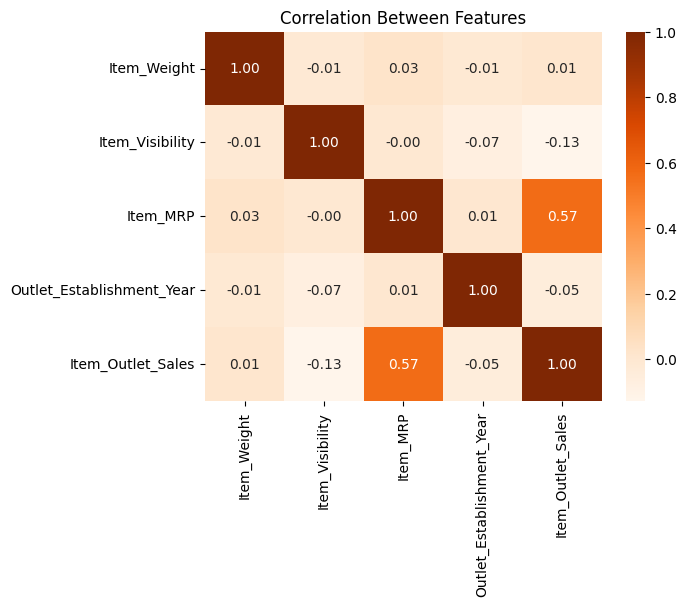

In [43]:
# Heatmap to show correlation between features

corr=df.corr()
sns.heatmap(corr, cmap = 'Oranges', annot = True, fmt = '.2f');

# set title
plt.title ('Correlation Between Features', fontsize = 'large')

There is also a moderately strong posiitve relationship between max retail price (MRP) of items sold and the outlets' sales. The higher (or cheaper) the MRP is, the higher (or lower) the outlet sales are.


Other features have no relationships to one another.

# Preprocessing of Data

> The goal of this step is to help the retailer by using machine learning to make predictions about future sales based on the data provided.

## Validation Split

In [44]:
# Split
X = df.drop('Item_Outlet_Sales', axis=1)
y = df['Item_Outlet_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## Instantiate Column Selectors

In [45]:
# Selectors
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

## Instantiate Transformers

In [46]:
# Imputers
freq_imputer = SimpleImputer (strategy = 'most_frequent')
mean_imputer = SimpleImputer (strategy = 'mean')

# scaler
scaler = StandardScaler()

# One-hot encoder
ohe = OneHotEncoder (handle_unknown = 'ignore', sparse = False)

## Ordinal Encoding

In [47]:
df ['Outlet_Size'].replace ({'Small': 0,
                             'Medium': 1,
                             'High': 2}, inplace = True)

In [48]:
df['Outlet_Size'].value_counts()

1.0    2793
0.0    2388
2.0     932
Name: Outlet_Size, dtype: int64

## Instantiate Pipelines

In [49]:
# numeric pipeline
numeric_pipe = make_pipeline (mean_imputer, scaler)
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [50]:
# categorical pipeline
categorical_pipe = make_pipeline (freq_imputer, ohe)
categorical_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

## ColumnTransformer

In [51]:
# make tuples for ColumnTransformer
num_tuple = (numeric_pipe, num_selector)
cat_tuple = (categorical_pipe, cat_selector)

# ColumnTransformer
preprocessor = make_column_transformer (num_tuple, cat_tuple)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7a2d42284fa0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7a2d422a4ca0>)])

## Transform Data

In [52]:
# fit on train
preprocessor.fit(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7a2d42284fa0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7a2d422a4ca0>)])

In [53]:
# transform the train and test
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform (X_test)

## Inspect the Result

In [54]:
# Check for missing values and that data is scaled and one-hot encoded
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('shape of data is', X_train_processed.shape)
print('\n')
X_train_processed

0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (6392, 1592)




array([[ 0.81724868, -0.71277507,  1.82810922, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.5563395 , -1.29105225,  0.60336888, ...,  0.        ,
         1.        ,  0.        ],
       [-0.13151196,  1.81331864,  0.24454056, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.11373638, -0.92052713,  1.52302674, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.76600931, -0.2277552 , -0.38377708, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.81724868, -0.95867683, -0.73836105, ...,  1.        ,
         0.        ,  0.        ]])

There are no missing data and all data are of type float64. There are 1593 columns now, rather than the original 12. As such, it ca be assumed that categorical columns have been one-hot encoded. Thus, the data is now ready for Machine Learning.